<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r9_i1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-15-m-1-r9.csv?token=AKVFSOBYZC4G6LXFHKRUXSS63I5X4')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-normal-n-0-15-r9.csv?token=AKVFSOHOK4Z2QMGCARXW6C263I5YU')


In [0]:
df = df1.append(df9, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [5]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,142,2,4,4,1,1,5,17,24,8,15,15,4,4,1,0.250000,8,31,1,31,31,8,16,20,340,0
1,142,2,4,4,1,1,5,17,24,8,15,15,3,4,1,0.250000,8,21,1,21,21,8,12,20,340,1
2,143,2,4,4,2,2,5,17,24,8,15,15,3,4,1,0.250000,9,20,2,21,40,8,48,20,340,1
3,143,2,4,4,2,2,5,17,24,8,15,15,4,4,1,0.250000,9,30,2,31,60,8,64,20,340,0
4,144,2,4,4,3,2,5,17,24,8,15,15,3,4,1,0.250000,10,19,3,21,57,8,72,20,340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96920,3276936,4,2,6,4,2,3,9,27,11,24,8,30095,3,2,0.666667,33,5,10,14,50,8,1444560,18,162,0
96921,3276943,4,2,6,5,3,3,9,27,11,24,8,30095,3,2,0.666667,40,4,11,14,44,8,2708550,18,162,0
96922,3276944,4,2,2,1,4,3,10,27,11,24,8,30096,3,2,0.666667,40,3,12,14,36,8,240768,6,60,0
96923,3276988,2,4,4,1,1,5,17,24,8,15,15,30096,4,1,0.250000,8,2,13,14,26,8,120384,20,340,0


In [6]:
df.shape

(96925, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-15-m-11-r9.csv?token=AKVFSOB5GJ644WPZILMYKES63I5X6')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-15-m-12-r9.csv?token=AKVFSOBOHTVG3MJMJANN6WK63I6C2')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-15-m-7-r9.csv?token=AKVFSOB6G5XYPI2M2MYYVWK63I6C4')


In [8]:
print(df13.shape)
print(df14.shape)
print(df15.shape)

(64099, 26)
(56360, 26)
(52835, 26)


Processing

In [9]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [11]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.429041,0.249125,0.062096,-0.093373,0.072711,0.109835,0.004606,-0.047247,-0.302821,-0.461747,-0.069009,-0.043069,-0.011420,-0.041154,-0.042730,0.418425,0.081208,0.274456,0.186620,0.004091
inport,-0.429041,1.000000,-0.300326,0.016550,-0.024952,0.469791,0.411731,0.031637,0.137181,-0.179802,-0.009315,-0.336214,0.021095,0.083776,0.079207,0.044320,0.577910,-0.064795,0.118773,0.346990,-0.055336
cache_coherence_type,0.249125,-0.300326,1.000000,0.226314,-0.340389,-0.286960,-0.289265,0.035948,-0.180622,-0.127732,-0.115105,-0.124446,0.058670,-0.037899,0.015688,0.013837,-0.083233,0.297804,0.634799,0.080845,-0.006478
flit_id,0.062096,0.016550,0.226314,1.000000,-0.035343,0.224969,0.200388,0.001893,0.086246,0.036682,-0.026739,0.367796,-0.035088,0.033319,-0.001336,-0.000059,0.085076,0.643304,0.377507,0.305328,-0.000364
flit_type,-0.093373,-0.024952,-0.340389,-0.035343,1.000000,-0.338434,-0.301460,-0.002930,-0.129745,-0.055146,0.040256,0.308554,-0.049293,0.053730,0.003351,0.002923,-0.127991,0.133886,-0.567847,-0.459301,0.000580
vnet,0.072711,0.469791,-0.286960,0.224969,-0.338434,1.000000,0.985975,0.006540,0.493033,-0.191644,-0.405725,-0.469666,-0.038652,0.076827,0.028833,0.005708,0.549138,-0.034636,0.558018,0.926917,-0.067616
vc,0.109835,0.411731,-0.289265,0.200388,-0.301460,0.985975,1.000000,0.007722,0.451345,-0.248888,-0.477077,-0.465902,-0.037194,0.086743,0.037423,0.014867,0.510008,-0.041546,0.544709,0.927360,-0.068729
traversal_id,0.004606,0.031637,0.035948,0.001893,-0.002930,0.006540,0.007722,1.000000,-0.042138,-0.041815,-0.012232,-0.007400,0.161393,0.162308,0.244484,0.180513,0.039870,0.545979,0.036415,0.020502,-0.308939
hop_count,-0.047247,0.137181,-0.180622,0.086246,-0.129745,0.493033,0.451345,-0.042138,1.000000,0.605129,0.210045,-0.043449,-0.122949,-0.078276,-0.151981,-0.138492,0.252714,-0.071992,0.241215,0.423566,0.078811
current_hop,-0.302821,-0.179802,-0.127732,0.036682,-0.055146,-0.191644,-0.248888,-0.041815,0.605129,1.000000,0.834240,0.478868,-0.063174,-0.142649,-0.155454,-0.123450,-0.254342,-0.036311,-0.265230,-0.282120,0.067461


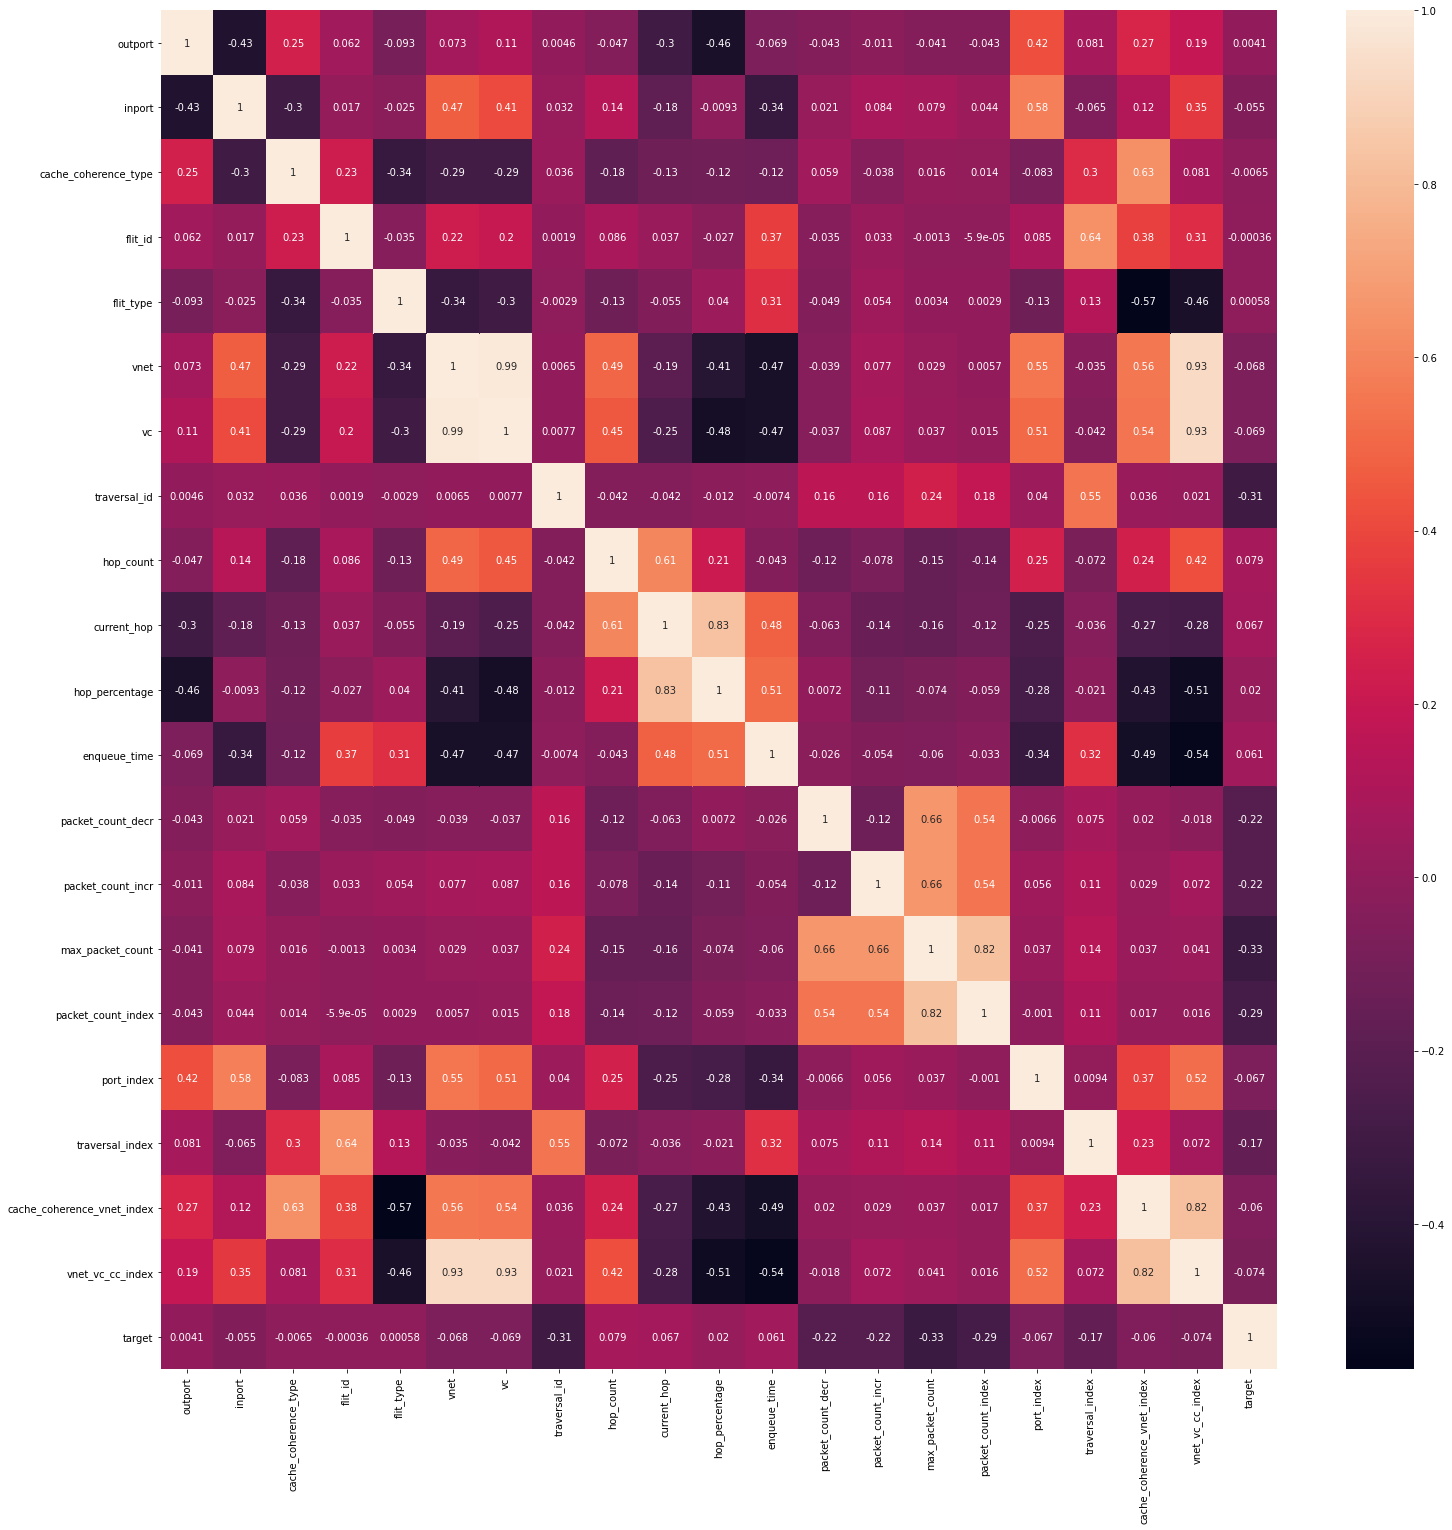

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [14]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'vnet']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

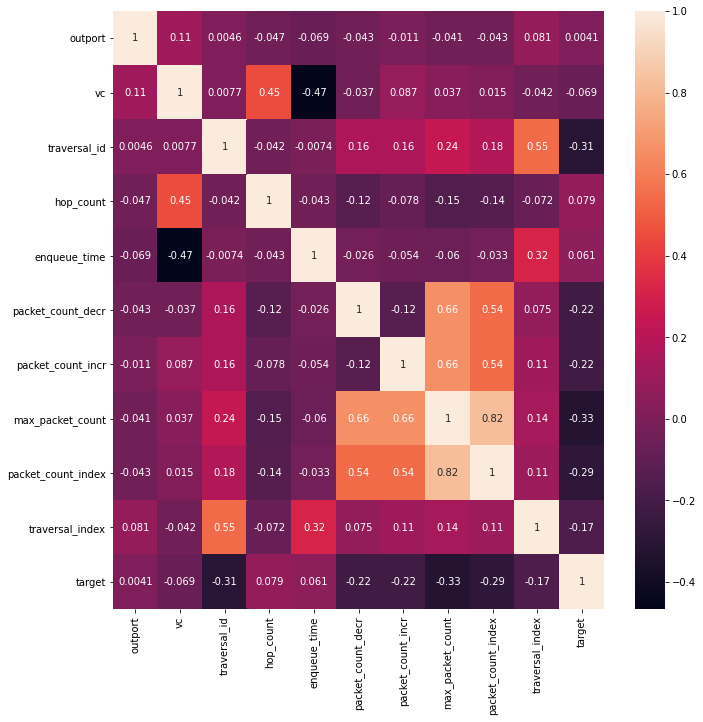

In [16]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

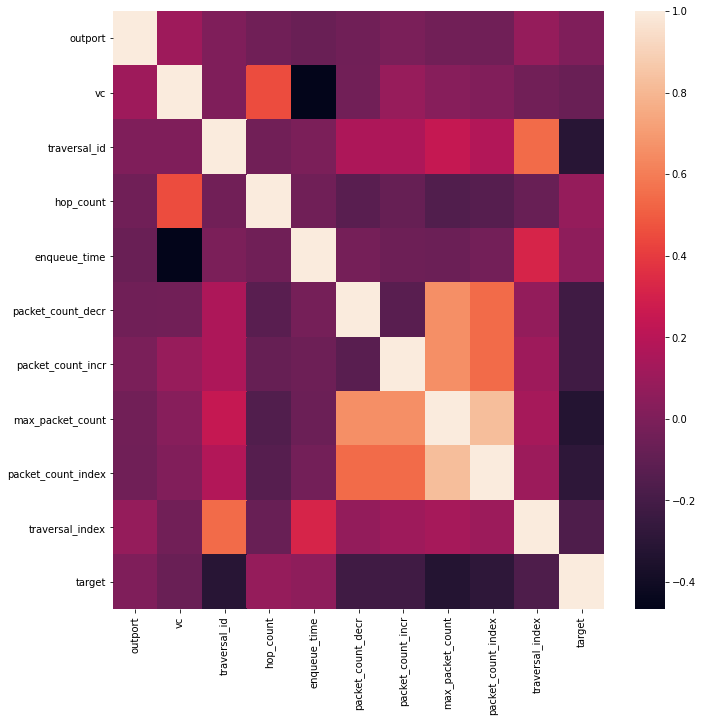

In [17]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [19]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.5,0.888889,0.000033,0.75,0.062500,0.218978,0.000000,0.218978,0.006212,0.000001
1,0.5,0.888889,0.000000,0.75,0.062500,0.145985,0.000000,0.145985,0.004142,0.000000
2,0.5,0.888889,0.000000,0.75,0.078125,0.138686,0.007299,0.145985,0.008076,0.000013
3,0.5,0.888889,0.000033,0.75,0.078125,0.211679,0.007299,0.218978,0.012218,0.000019
4,0.5,0.888889,0.000000,0.75,0.093750,0.131387,0.014599,0.145985,0.011597,0.000022
...,...,...,...,...,...,...,...,...,...,...
96920,1.0,0.000000,0.999967,0.50,0.453125,0.029197,0.065693,0.094891,0.010147,0.533331
96921,1.0,0.000000,0.999967,0.50,0.562500,0.021898,0.072993,0.094891,0.008905,1.000000
96922,1.0,0.111111,1.000000,0.50,0.562500,0.014599,0.080292,0.094891,0.007248,0.088888
96923,0.5,0.888889,1.000000,0.75,0.062500,0.007299,0.087591,0.094891,0.005177,0.044442


In [20]:
train_X[train_X.duplicated()].shape

(0, 10)

In [21]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,1.00,0.000000,0.000000,0.5,0.125000,0.319328,0.000000,0.319328,0.010385,0.000000
1,0.50,0.888889,0.000000,0.5,0.062500,0.310924,0.008403,0.319328,0.020497,0.000000
2,0.50,0.888889,0.000000,0.5,0.078125,0.302521,0.016807,0.319328,0.030063,0.000018
3,0.50,0.888889,0.000000,0.5,0.093750,0.294118,0.025210,0.319328,0.039082,0.000030
4,0.50,0.888889,0.000000,0.5,0.109375,0.285714,0.033613,0.319328,0.047554,0.000041
...,...,...,...,...,...,...,...,...,...,...
64094,0.75,0.000000,0.999801,1.0,0.515625,0.016807,0.134454,0.151261,0.013665,0.444559
64095,0.75,0.000000,0.999801,1.0,0.625000,0.008403,0.142857,0.151261,0.009565,0.833554
64096,0.75,0.111111,0.999834,1.0,0.625000,0.000000,0.151261,0.151261,0.004919,0.044452
64097,1.00,0.000000,1.000000,0.5,0.125000,0.008403,0.000000,0.008403,0.000273,0.066692


In [22]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [23]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [25]:
train_Y = df['target']
train_Y.value_counts()

0    60740
1    36185
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
2        traversal_id  1016.013153
7    max_packet_count   823.927826
8  packet_count_index   798.220499
6   packet_count_incr   413.992121
5   packet_count_decr   409.937026
9     traversal_index   316.739630
1                  vc   155.286432
3           hop_count    65.571274
4        enqueue_time    28.551843
0             outport     0.317887


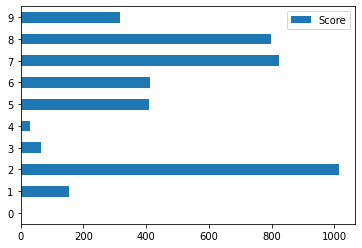

In [28]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [33]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 97.6747409107008
Test Prediction Score 95.41674482586131


In [34]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 82.0714831744645
Test Prediction Score 78.73669268985097
Test Prediction Score 79.83344373994511


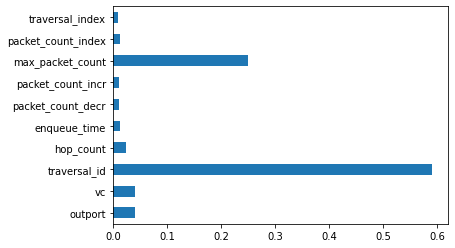

In [35]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

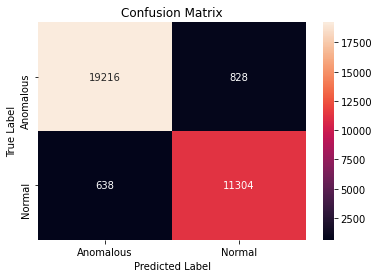

In [36]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [37]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     20044
           1       0.93      0.95      0.94     11942

    accuracy                           0.95     31986
   macro avg       0.95      0.95      0.95     31986
weighted avg       0.95      0.95      0.95     31986



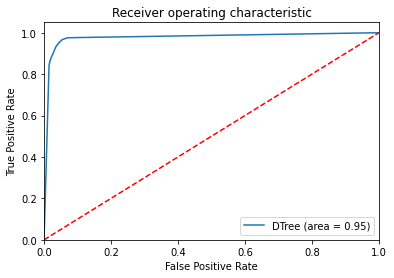

In [38]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [40]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r9l-i1.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [43]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 99.55292940661539


In [44]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 84.02003151375217
Test Prediction Score 81.70156139105748
Test Prediction Score 82.19362165231381


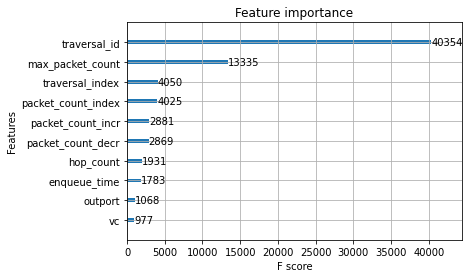

In [45]:
plot_importance(xgbc)
plt.show()

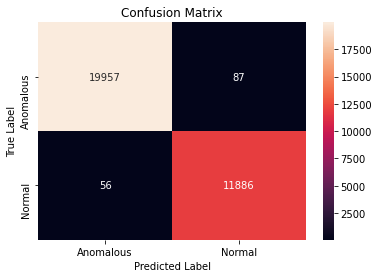

In [46]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [47]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20044
           1       0.99      1.00      0.99     11942

    accuracy                           1.00     31986
   macro avg       0.99      1.00      1.00     31986
weighted avg       1.00      1.00      1.00     31986



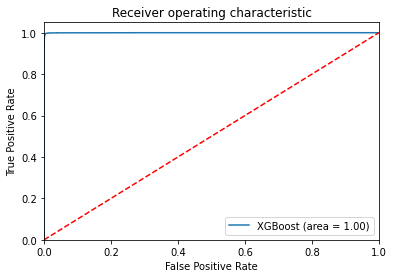

In [48]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()